In [1]:
import torch
from memflow.phasespace.phasespace import PhaseSpace
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from  memflow.phasespace.utils import *
torch.set_default_dtype(torch.double)

In [2]:
E_CM = 13000
phasespace = PhaseSpace(E_CM, [21,21], [25,6,-6,21])

In [3]:
points_out, momenta, weight, x1, x2 = phasespace.generate_random_phase_space_points(10000)

print(momenta.shape)

torch.Size([10000, 6, 4])


Text(0.5, 0, 'Pz')

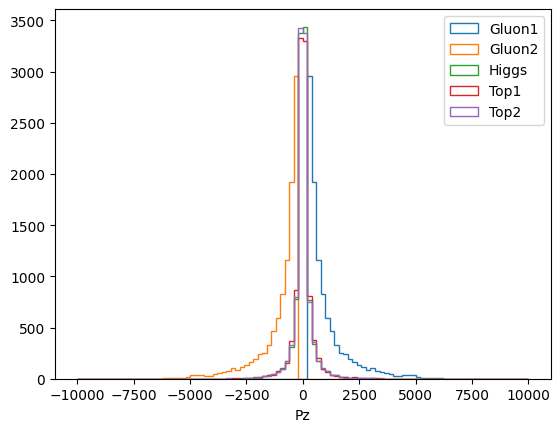

In [5]:
plt.hist(momenta[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'Px')

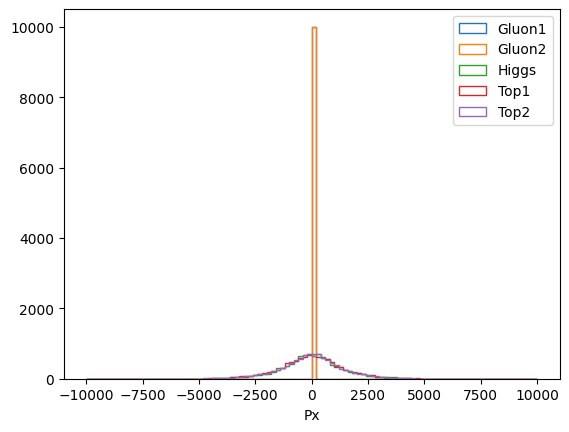

In [33]:
plt.hist(momenta[:,0,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,1], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'E')

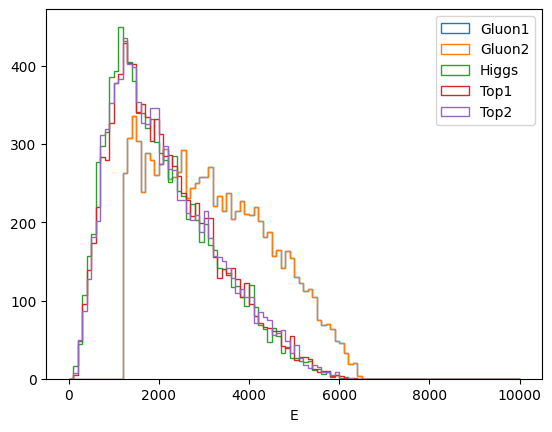

In [32]:
plt.hist(momenta[:,0,0], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,0], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,0], bins=100, range=(0,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,0], bins=100, range=(0,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,0], bins=100, range=(0,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("E")

In [35]:
x1

tensor([0.0615, 0.4713, 0.6466,  ..., 0.7913, 0.6924, 0.9968])

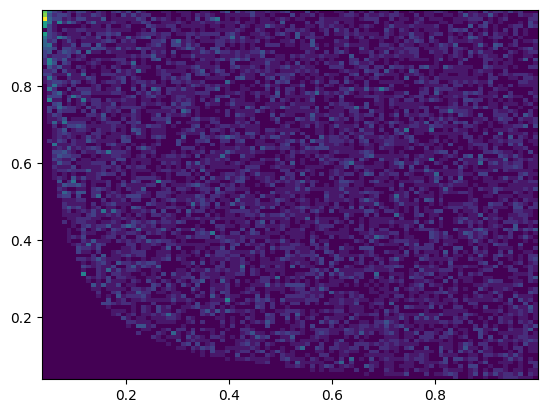

In [38]:
plt.hist2d(x1.numpy(), x2.numpy(), bins=100);

In [40]:
momenta

tensor([[[ 1254.9326,     0.0000,     0.0000,  1254.9326],
         [ 1254.9326,     0.0000,     0.0000, -1254.9326],
         [ 1149.0980,   254.8898,    27.9861, -1113.0978],
         [  642.9193,  -143.4671,  -337.7353,   498.9399],
         [  717.8480,  -111.4228,   309.7492,   614.1579]],

        [[ 2921.5903,     0.0000,     0.0000,  2921.5903],
         [ 2921.5903,     0.0000,     0.0000, -2921.5903],
         [ 1543.9388,   116.3857,  -443.1008,  1469.0730],
         [ 2741.7339, -1446.0674,   763.1809, -2194.0357],
         [ 1557.5081,  1329.6816,  -320.0801,   724.9627]],

        [[ 4522.2393,     0.0000,     0.0000,  4522.2393],
         [ 4522.2393,     0.0000,     0.0000, -4522.2393],
         [ 1282.9074,    34.8249,  1255.8140,  -227.7767],
         [ 4142.4771,   591.2962, -1598.7515,  3771.5677],
         [ 3619.0945,  -626.1211,   342.9374, -3543.7910]],

        ...,

        [[ 4346.9551,     0.0000,     0.0000,  4346.9551],
         [ 4346.9551,     0.0000,   

# Go back from momenta and x1 x2 to phasespace points

In [4]:
PS, prob = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)  #get from partons and 
print(PS.shape)
print(points_out.shape)

torch.Size([10000, 10])
torch.Size([10000, 10])


In [5]:
r = phasespace.get_ps_from_momenta_correct(momenta, x1, x2)
print(r.shape)

torch.Size([10000, 8])


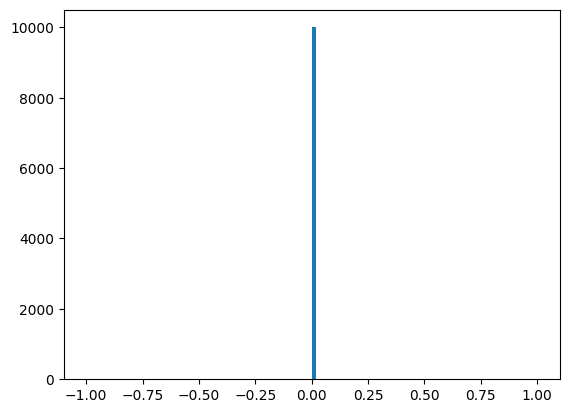

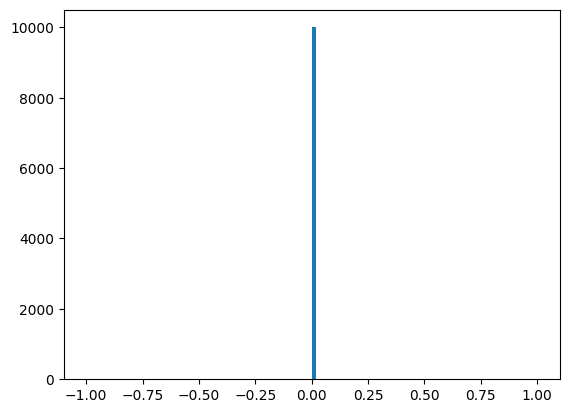

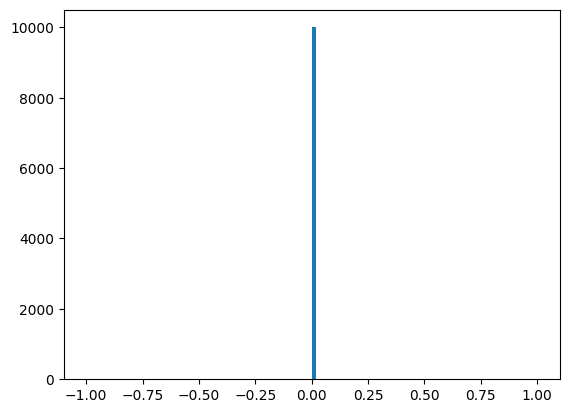

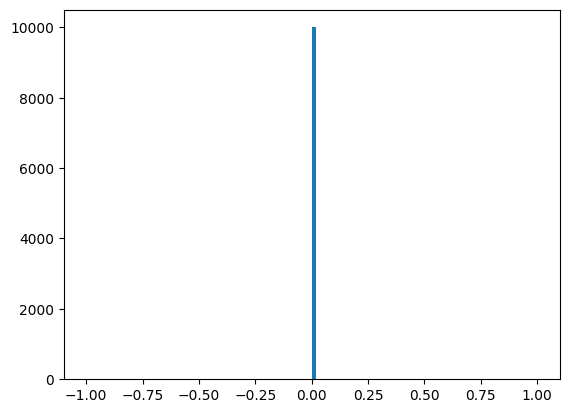

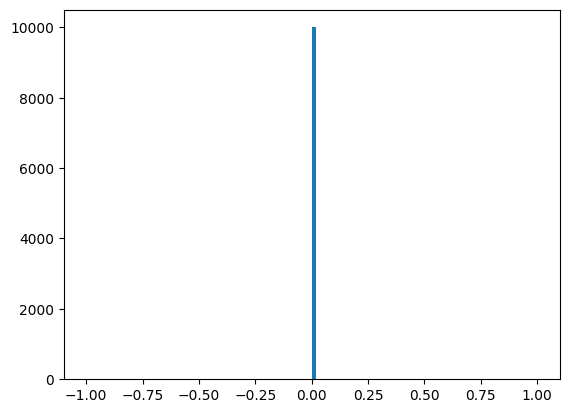

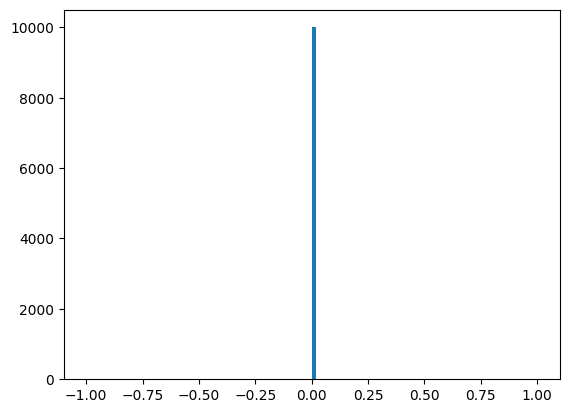

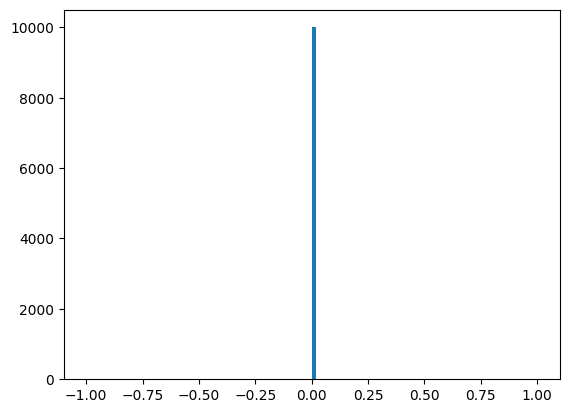

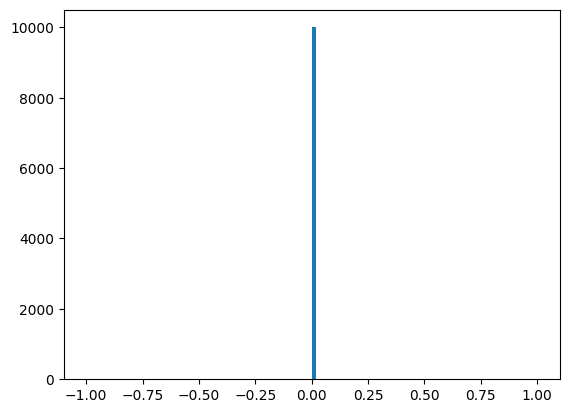

In [6]:
for i in range(8):
    plt.hist(r[:,i].numpy() - PS[:,i].numpy(), bins=100, range=(-1,1))
    plt.show()

torch.Size([10000, 6, 4])


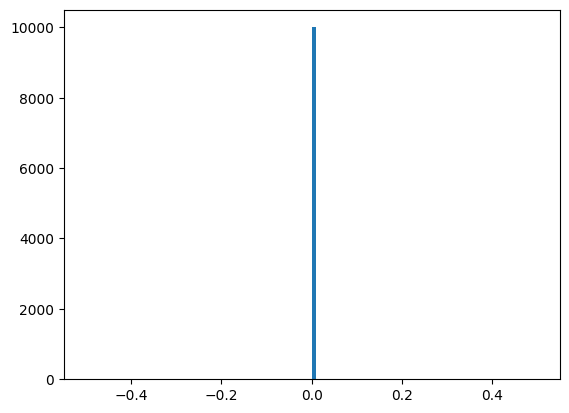

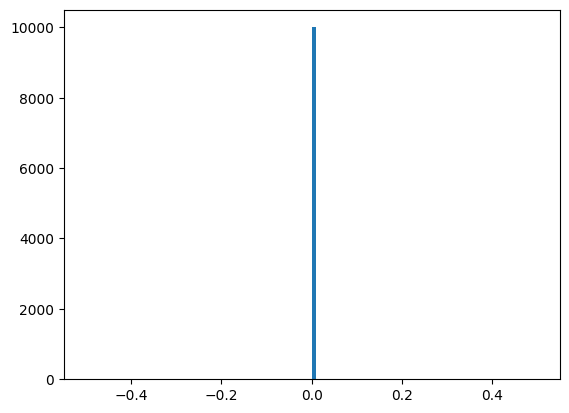

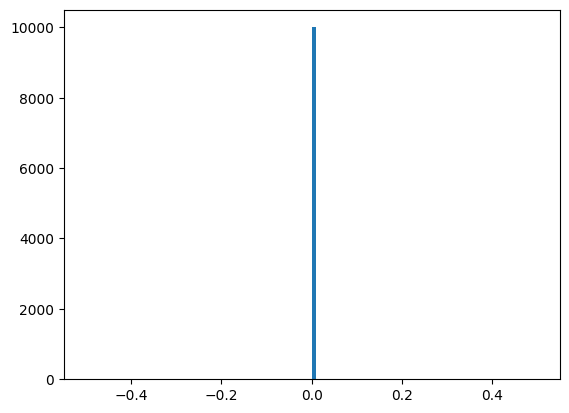

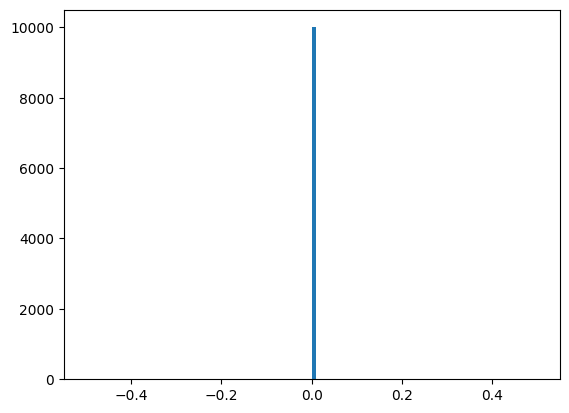

In [24]:
mom_old, weight, x1, x2 = phasespace.get_momenta_from_ps_old(PS)
mom, weight, x1, x2 = phasespace.get_momenta_from_ps(PS)

print(mom.shape)

particle = 4

for i in range(4):
    plt.hist(mom_old[:,particle,i].numpy() - mom[:,particle,i].numpy(), bins=100)
    plt.show()

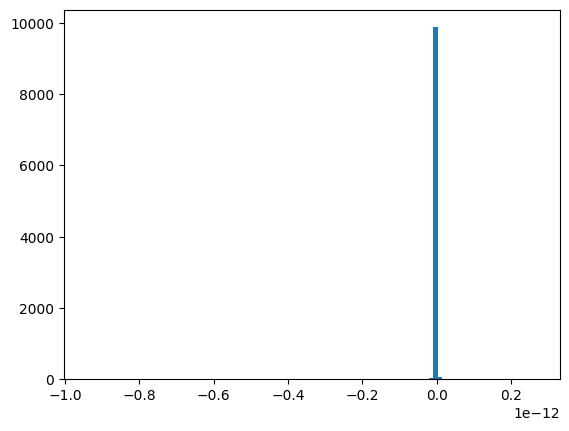

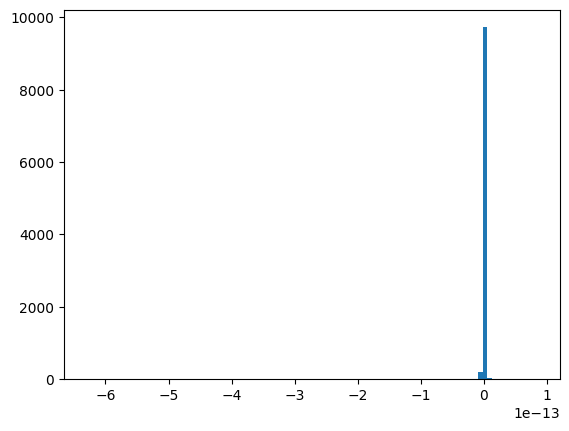

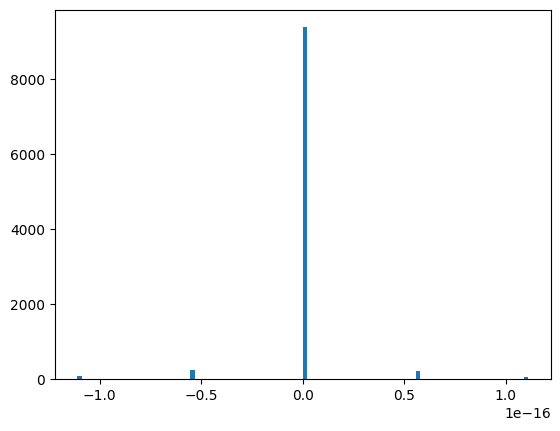

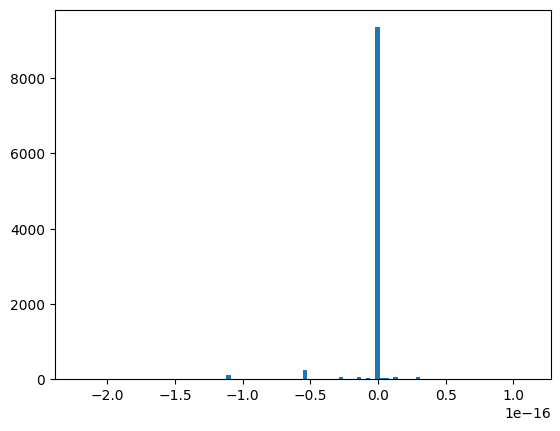

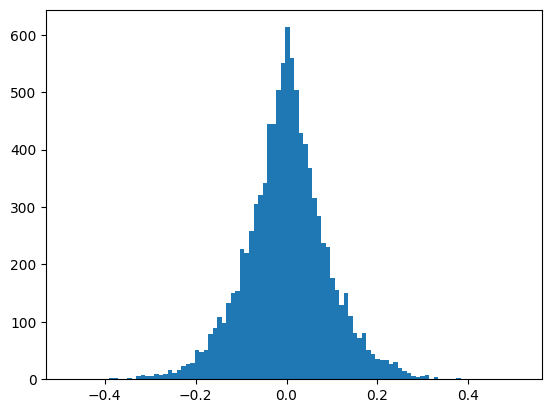

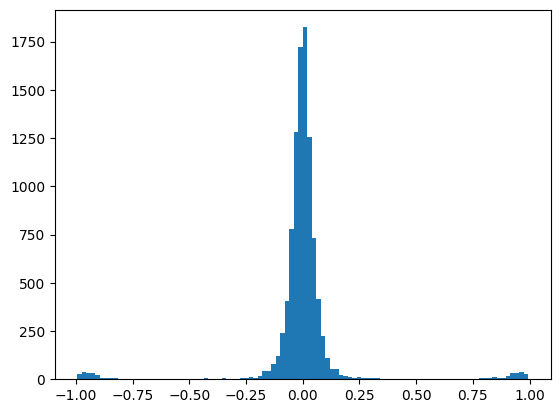

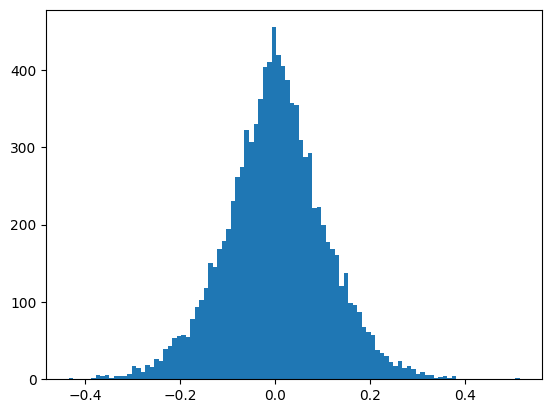

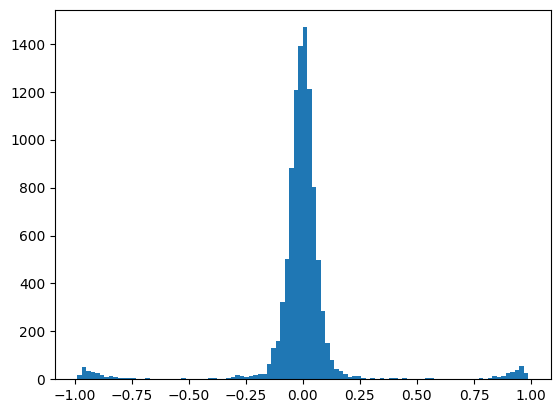

In [25]:
PS1, det = phasespace.get_ps_from_momenta(mom[:,2:], x1, x2)

particle = 0

for i in range(8):
    plt.hist(PS1[:,i].numpy() - PS[:,i].numpy(), bins=100)
    plt.show()

In [60]:
r

tensor([[0.0734, 0.0128, 0.0174,  ..., 0.7399, 0.0262, 0.0436],
        [0.7153, 0.9773, 0.7909,  ..., 0.4436, 0.4514, 0.3812],
        [0.9255, 0.4108, 0.2456,  ..., 0.8408, 0.6334, 0.7337],
        ...,
        [0.5718, 0.4071, 0.1568,  ..., 0.9567, 0.7834, 0.5444],
        [0.3047, 0.6267, 0.4960,  ..., 0.2691, 0.6809, 0.6813],
        [0.0893, 0.2457, 0.0416,  ..., 0.5648, 0.9967, 0.2434]])